# EDA on biathlon races data.

Period: 2001-2020
Cup: World championship
Race type: Pursuit

In this notebook I'll explore the data of biathlon races gathered via `biathlon.ipynb`. I'll also be doing a bit of data cleaning and feature engineering. 

In [1]:
#importing necessary libraires

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [105]:
# sns plot settings
sns.set(style='white', rc={"figure.figsize":[10,5]})

#setting pandas IndexSclice
idx = pd.IndexSlice

The data is stored in `pursuit_data.csv`

In [3]:
# reading the data

df = pd.read_csv('pursuit_data.csv')
df.head()

,race_type,race_location,race_day,race_time,rank,bib,name,country,start_behind,prone1,prone2,stand1,stand2,err_total,result_time,cup_points,pdf_path,race_id,gender,race_country
0,MEN 12.5 KM PURSUIT,khanty-mansiysk,2016-03-19,18:30,1,2,SCHEMPP Simon,GER,0:01,1.0,1.0,0.0,1.0,3.0,33:27.8,60.0,race_data/pursuit/BT_C73D_1.0 - 2020-08-13T195...,0,male,RUS
1,MEN 12.5 KM PURSUIT,khanty-mansiysk,2016-03-19,18:30,2,7,BOE Johannes Thingnes,NOR,1:02,0.0,0.0,0.0,1.0,1.0,+8.5,54.0,race_data/pursuit/BT_C73D_1.0 - 2020-08-13T195...,0,male,RUS
2,MEN 12.5 KM PURSUIT,khanty-mansiysk,2016-03-19,18:30,3,5,LESSER Erik,GER,0:38,0.0,0.0,1.0,1.0,2.0,+15.7,48.0,race_data/pursuit/BT_C73D_1.0 - 2020-08-13T195...,0,male,RUS
3,MEN 12.5 KM PURSUIT,khanty-mansiysk,2016-03-19,18:30,4,11,WEGER Benjamin,SUI,1:15,0.0,0.0,0.0,0.0,0.0,+18.7,43.0,race_data/pursuit/BT_C73D_1.0 - 2020-08-13T195...,0,male,RUS
4,MEN 12.5 KM PURSUIT,khanty-mansiysk,2016-03-19,18:30,5,8,DOLL Benedikt,GER,1:03,1.0,0.0,1.0,0.0,2.0,+27.3,40.0,race_data/pursuit/BT_C73D_1.0 - 2020-08-13T195...,0,male,RUS


In [4]:
#overview of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17238 entries, 0 to 17237
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   race_type      17238 non-null  object 
 1   race_location  17238 non-null  object 
 2   race_day       17238 non-null  object 
 3   race_time      17238 non-null  object 
 4   rank           17238 non-null  int64  
 5   bib            17238 non-null  int64  
 6   name           17238 non-null  object 
 7   country        17238 non-null  object 
 8   start_behind   17238 non-null  object 
 9   prone1         16557 non-null  float64
 10  prone2         16516 non-null  float64
 11  stand1         16400 non-null  float64
 12  stand2         16178 non-null  float64
 13  err_total      16178 non-null  float64
 14  result_time    16080 non-null  object 
 15  cup_points     10440 non-null  float64
 16  pdf_path       17238 non-null  object 
 17  race_id        17238 non-null  int64  
 18  gender

  
  
We see that we have relatively small dataset of 17k rows and 20 columns. There are a few missing values aswell. I'll deal with them later. For now lets explore each column one-by-one.

## Race type, location and chronology

In [5]:
df['race_type'].value_counts()

MEN 12.5 KM PURSUIT      4553
MEN 12.5 km PURSUIT      3718
WOMEN 10 km PURSUIT      3703
WOMEN 10 KM PURSUIT      3069
WOMEN 10km PURSUIT       1550
MEN'S 12.5 KM PURSUIT     118
MEN 12.5km PURSUIT        115
Women's 10km Pursuit      114
MEN'S 12.5 km PURSUIT      60
WOMEN'S 10 km PURSUIT      60
Men's 12.5km Pursuit       60
WOMEN'S 10 KM PURSUIT      60
Men's 12.5 km Pursuit      58
Name: race_type, dtype: int64

Since we know that this dataset focuses only on pursuit-type races we'll be removing `race_type` column. We also will be removing `pdf_path` column which contains paths to original pdf files used for gathering raw data. It is useless for the analysis, but was handy for debugging.

In [6]:
df.drop(columns=['race_type', 'pdf_path'], inplace=True)

In [7]:
# let's explore 'race_location' column

df['race_location'].value_counts()

hochfilzen                        2105
holmenkollen                      1881
pokljuka                          1410
ruhpolding                        1171
östersund                         1130
kontiolahti                       1055
oberhof                           1050
antholz-anterselva                 977
oestersund                         882
khanty-mansiysk                    708
nove mesto                         583
antholz - anterselva               401
brezno-osrblie                     360
annecy                             349
chiemgau arena                     240
lahti                              240
antholz obertal                    239
alpensia biathlon center           238
soldier hollow                     228
presque isle                       225
nordic sport complex               120
biathlon stadion am grenzadler     120
verizon sports complex             120
trondheim                          120
nordic ski centre                  120
beitostolen              

This column shows where the race took place. However, I've noticed that some values look identical in meaning, but spelled differently, which is a bug in data gathering process. For convinience let's assume that specific stadium/venue isn't adding any meaningful infomation since we have `race_country` column.

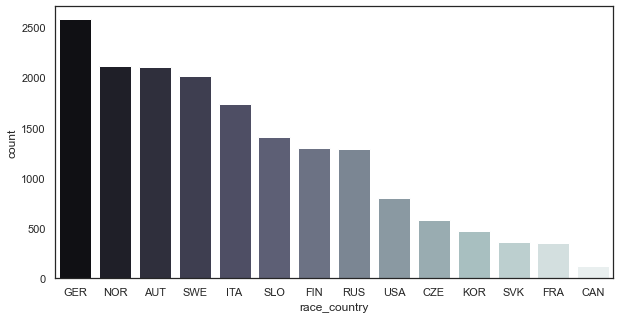

In [8]:
sns.countplot(x=df['race_country'],
              palette='bone',
              order=df['race_country'].value_counts().index
             );

We can see that most races take place in 5 countries: Germany, Norway, Austria, Sweden and Italy. Now I'm curious if we see same distribution of countires represented by biatletes. WIll german biathletes dominate the scene since biatlon is so popular in their country? Does competing on home turf help beathletes achieve greater performance? These are interesting questions that I'll try to answer later in the analysis.

Next up we have `race_day` and `race_time` columns with `object`(string) data type. Looking at first bunch of rows (`df.head()`) we see that these column are perfect for concatenating and converting to `datetime` data type for easier manipulation. 

In [9]:
df['race_datetime'] = pd.to_datetime(df['race_day'] + ' ' +  df['race_time'])
df.drop(columns=['race_day', 'race_time'], inplace=True)
df['race_datetime'].dtype

dtype('<M8[ns]')

Now we getting desirable `type('<M8[ns]')` data type for timeseries elements. Let's take a closer look at it.

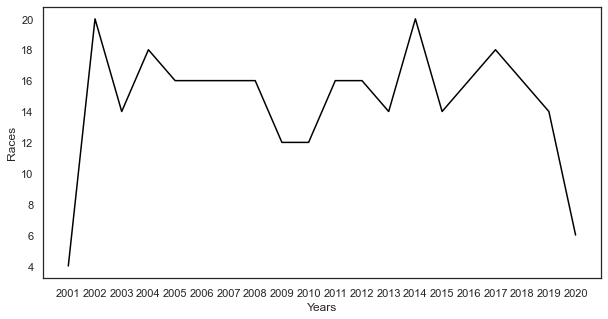

In [10]:
# extracting year, month and weekday_name from `race_datetime`
df['year'] = df['race_datetime'].dt.year
df['month'] = df['race_datetime'].dt.month
df['weekday'] = df['race_datetime'].dt.day_name()

#plotting # of races each year in the dataset
sns.lineplot(data=df.groupby('year')['race_id'].nunique(),
             color='black',
            )
#explicitly setting xticks to show years instead of decimals like 2002.5
plt.xticks(df.groupby('year')['race_id'].nunique().index.tolist())
plt.xlabel('Years')
plt.ylabel('Races');

The graph above verifies that the dataset contains races from 2001-2002 to 2019-2020 seasons. 2001 and 2020 have fewer races than other years and thats OK due to the nature of biathlon seasons. Also we see that we can expect 14 to 18 races in a year. What is also interesting for me is how the tournament holding countries popularity changed over the years. Let's plot it.

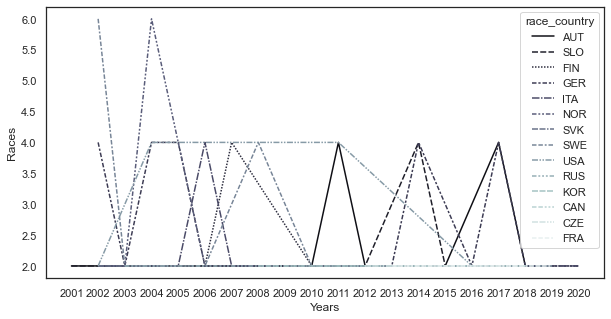

In [11]:
#plotting how many races each country got over the years
sns.lineplot(data=df.groupby(['year', 'race_country'])['race_id'].nunique().reset_index('race_country'),
             x='year',
             y='race_id',
             hue='race_country',
             style='race_country',
             palette='bone'
            )

#explicitly setting xticks to show years instead of decimals like 2002.5
plt.xticks(df.groupby('year')['race_id'].nunique().index.tolist())
plt.xlabel('Years')
plt.ylabel('Races');

This graph is messy, but we can clearly see that since 2006 each country gets from 2 to 4 pursuit races over the season, which was not the case in 2002-2004 when Norway and Germany were go-to placew for biathlon spectators.

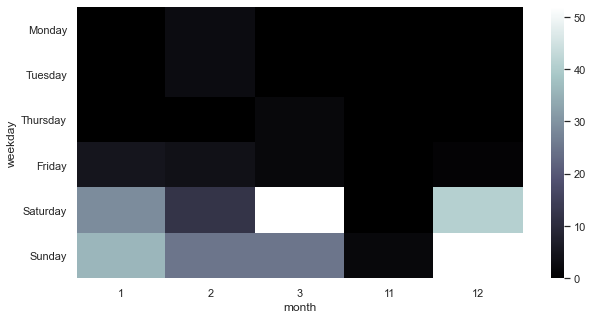

In [12]:
# crating a slice of dataframe with weekdays and monts as indexes and # of races as values
month_day_count = df.groupby(['weekday', 'month'])['race_id'].nunique().to_frame()
# shaping new dataframe to rectangular
month_day_count = month_day_count.reset_index().pivot(index='weekday', 
                                                      columns='month', 
                                                      values='race_id'
                                                     ).fillna(0)
# creating sorting key for weekdays to avoid default sort
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(days)}
month_day_count = month_day_count.sort_index(key=lambda x:x.map(mapping))

#plotting heatmap
sns.heatmap(data=month_day_count, cmap='bone');

It is obvious that majority of the pursuit races happen during weekend, firstly because they are (in my opinion) more thrilling than let's say individual or sprint races and, secondly, the starting order in pursuit races is depens on the oucome of sprint races

## Biathlete performance

- who's the best? fastest? most accurate? most cup points? over time? home turf importance? is being 1st to start an undeniable advantage?
- what countries are represented? which are more successful?

### Hall of fame
Of course when we talk about competetive fiels our first question is "Who is the best?"). It's very easy to find out.

In [167]:
## creating new dataframe `most_rank1` for plotting "hall of fame"
#counting how many rank == 1 each biathlete have had
most_rank1 = df.loc[df['rank'] == 1][['name', 'gender', 'race_id']].groupby(['gender', 'name']).count()
#sorting values within each gender group
most_rank1 = most_rank1.sort_values(by=['gender', 'race_id'], ascending=False).reset_index('gender')
#selecting top 5 biathletes from each gender group
most_rank1 = most_rank1.groupby('gender').head().reset_index()
# concatenating country of a biathlete to his name
name_conc_df = df.loc[df['name'].isin(most_rank1['name'])][['name', 'country']].groupby('name').head(1)
name_concatenator = lambda x: x + ' ({})'.format(name_conc_df.loc[name_conc_df['name'] == x].country.iloc[0])
most_rank1['name'] = most_rank1['name'].apply(name_concatenator)

#lets take a look at resulting dataframe
most_rank1

,name,gender,race_id
0,FOURCADE Martin (FRA),male,30
1,BJOERNDALEN Ole Einar (NOR),male,29
2,BOE Johannes Thingnes (NOR),male,12
3,SVENDSEN Emil Hegle (NOR),male,11
4,POIREE Raphael (FRA),male,10
5,MAKARAINEN Kaisa (FIN),female,13
6,DAHLMEIER Laura (GER),female,11
7,DOMRACHEVA Darya (BLR),female,11
8,BAILLY Sandrine (FRA),female,9
9,BERGER Tora (NOR),female,9


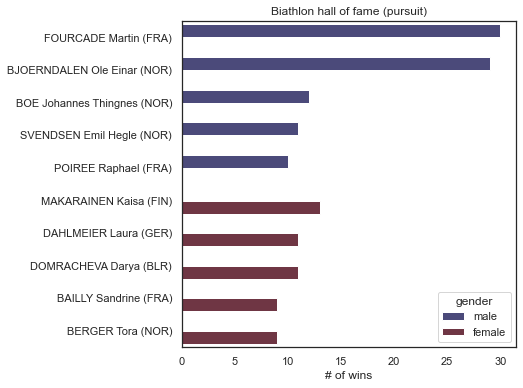

In [185]:
#plotting biathlon hall of fame
f, ax = plt.subplots(figsize=(6,6))
sns.barplot(data=most_rank1,
            x='race_id',
            y='name',
            hue='gender',
            palette='icefire'
           )
plt.title('Biathlon hall of fame (pursuit)')
plt.xlabel('# of wins')
plt.ylabel('');

Okay, meet the two male biathlon legends - Martin Fourcade and Ole Einar Bjoerndalen splitting almost 60 wins beetween them, out of 147 races! Entire male top 5 is dominates by 2 countries - France and Norway. Females, however, share much more competitive field since nobody have more that 15 gold medals. But what about countries? I'd like to see top 10 countries measured by number of medals achieved.

In [194]:
##preparing data for plotting
#counting how many medals each country won
cg_top = df.loc[df['rank'].isin([1, 2, 3])][['country', 'gender', 'rank', 'race_id']]
cg_top = cg_top.groupby(['gender', 'country', 'rank']).count()
#reshaping data, renaming columns, calculating total columns
cg_top = cg_top.unstack().fillna(0)
cg_top.columns = ['gold', 'silver', 'bronze']
cg_top['total'] = cg_top.sum(axis=1)
cg_top = cg_top.sort_values(by=['gender', 'total'], ascending=False)

#removing gender group from cg_top dataframe for plotting purposes, selecting top10 countries
top_countries = cg_top.reset_index(level='gender', drop=True).groupby('country').sum().sort_values(by='total', ascending=False)
top_countries = top_countries.head(10)

#
top_by_gender = cg_top.groupby(['gender']).head(10)
top_by_gender.loc[idx['male', :],:].index.get_level_values(1)

Index(['NOR', 'FRA', 'RUS', 'GER', 'AUT', 'SWE', 'CZE', 'SLO', 'POL', 'ITA'], dtype='object', name='country')

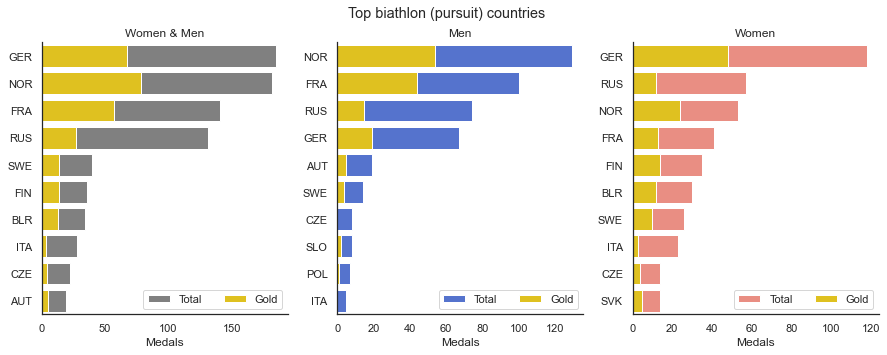

In [201]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#plot total medals, both genders
sns.barplot(data=top_countries, x='total', y=top_countries.index,
            color='grey', label='Total', ax=axes[0]
           )
#plot gold medals, both genders
sns.barplot(data=top_countries, x='gold', y=top_countries.index,
            color='gold', label='Gold', ax=axes[0]
           )
#same plot as above, but for men
sns.barplot(data=top_by_gender.loc[idx['male', :],:], x='total', 
            y=top_by_gender.loc[idx['male', :],:].index.get_level_values(1),
            color='royalblue', label='Total', ax=axes[1]
           )
sns.barplot(data=top_by_gender.loc[idx['male', :],:], x='gold', 
            y=top_by_gender.loc[idx['male', :],:].index.get_level_values(1),
            color='gold', label='Gold', ax=axes[1]
           )
#same plot as above, but for women
sns.barplot(data=top_by_gender.loc[idx['female', :],:], x='total', 
            y=top_by_gender.loc[idx['female', :],:].index.get_level_values(1),
            color='salmon', label='Total', ax=axes[2]
           )
sns.barplot(data=top_by_gender.loc[idx['female', :],:], x='gold', 
            y=top_by_gender.loc[idx['female', :],:].index.get_level_values(1),
            color='gold', label='Gold', ax=axes[2]
           )

# Add a legend and informative axis label
for i,j in enumerate(['Women & Men', 'Men', 'Women']):
    axes[i].legend(ncol=2, loc='lower right', frameon=True)
    axes[i].set(ylabel='',
                xlabel='Medals',
                title=j
               )
fig.suptitle('Top biathlon (pursuit) countries')
sns.despine(left=False, bottom=False)
